<a href="https://colab.research.google.com/github/Ali-Hasan-Khan28/Natural-Language-Processing/blob/main/Lab06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("Welcome")

Welcome


In [ ]:
pip install spacy gensim


In [ ]:
!python -m spacy download en_core_web_md
import spacy
word2vec_model = spacy.load("en_core_web_md").vocab


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 15.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# Download the model
!python -m spacy download en_core_web_md

# Load the model using gensim
import gensim
word2vec_model = gensim.models.Word2Vec.load('en_core_web_md/en_core_web_md.model')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 21.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


FileNotFoundError: [Errno 2] No such file or directory: 'en_core_web_md/en_core_web_md.model'

In [ ]:
import spacy
from gensim.models import KeyedVectors
from gensim.downloader import load

# # Load the GloVe model (50-dimensional vectors)
# glove_model = load('glove-wiki-gigaword-50')

# You can also load the Word2Vec model using the same approach
# word2vec_model = load('word2vec-google-news-300')


# Load the Word2Vec model using spacy
# Note: You may need to download the 'en_core_web_md' model if not already downloaded
# python -m spacy download en_core_web_md
word2vec_model = spacy.load("en_core_web_md").vocab

ValueError: Incorrect model/corpus name

In [ ]:
# Function to find most similar words using Word2Vec
def most_similar_words(model, words, topn=5):
    for word in words:
        similar_words = [lexeme.text for lexeme in sorted(model, key=lambda x: model[word].similarity(x), reverse=True)[:topn]]
        print(f"Most similar words to '{word}': {', '.join(similar_words)}")

# Function to solve word analogies using Word2Vec
def solve_word_analogy(model, analogy):
    a, b, c = analogy
    word_a = model[a]
    word_b = model[b]
    word_c = model[c]
    result = model.most_similar(positive=[word_b, word_c], negative=[word_a], topn=1)
    print(f"{a} is to {b} as {c} is to {result[0][0]}")

# Example words
word_list = ["king", "computer", "Paris"]

# Find most similar words using Word2Vec
print("\nUsing Word2Vec:")
most_similar_words(word2vec_model, word_list)

# Solve word analogies using Word2Vec
print("\nSolving Word Analogies using Word2Vec:")
solve_word_analogy(word2vec_model, ("king", "man", "woman"))



Using Word2Vec:
Most similar words to 'king': king, r., ’cause, that’s, that
Most similar words to 'computer': computer, somethin, space, that’s, that
Most similar words to 'Paris': Paris, D.C., La, Mont, La.

Solving Word Analogies using Word2Vec:


<ipython-input-18-9c7b397c7b65>:4: UserWarning: [W008] Evaluating Lexeme.similarity based on empty vectors.
  similar_words = [lexeme.text for lexeme in sorted(model, key=lambda x: model[word].similarity(x), reverse=True)[:topn]]


AttributeError: 'spacy.vocab.Vocab' object has no attribute 'most_similar'

In [ ]:
from gensim.models import KeyedVectors
import gensim.downloader as api

# Download the pre-trained Word2Vec model (you can choose a different model by changing the name)
model_name = "word2vec-google-news-300"
model = api.load(model_name)


[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
# # Example list of words for which you want to find similar words
# word_list = ['king', 'queen', 'man', 'woman', 'apple', 'orange']

# # Find similar words for each word in the list
# similar_words_dict = {}

# for word in word_list:
#     if word in model.key_to_index:
#         similar_words = model.most_similar(word)
#         similar_words_dict[word] = [w for w, _ in similar_words]
#     else:
#         similar_words_dict[word] = []

# # Print the results
# for word, similar_words in similar_words_dict.items():
#     print(f"Similar words for '{word}': {', '.join(similar_words)}")

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
# Get vectors for the words
king_vector = model.get_vector('hello')
man_vector = model.get_vector('greetings')
woman_vector = model.get_vector('welcome')

# Calculate the vector arithmetic: king - man + woman
result_vector = king_vector - man_vector + woman_vector

# Calculate cosine similarity between the result vector and all word vectors
similarities = cosine_similarity([result_vector], model.vectors)

# Find the index of the most similar word
most_similar_index = similarities.argmax()

# Get the most similar word
result_word = model.index_to_key[most_similar_index]

print(f"The result of 'king - man + woman' is: {result_word}")

The result of 'king - man + woman' is: welcome


In [ ]:
# Find most similar words
def find_similar_words(model, words, topn=5):
    similar_words = {}
    for word in words:
        if word in model:
            similar_words[word] = model.most_similar(word, topn=topn)
    return similar_words

# Solve word analogies
def solve_word_analogies(model, a, b, c, topn=5):
    if all(word in model for word in [a, b, c]):
        d = model.most_similar(positive=[b, c], negative=[a], topn=topn)
        return d
    else:
        return None

# Example usage
words = ["king", "computer", "Paris"]

print("Word2Vec Model:")
similar_words_word2vec = find_similar_words(model, words)
for word, sim_words in similar_words_word2vec.items():
    print(word + ":")
    for sim_word, score in sim_words:
        print(f"  {sim_word}: {score}")

print("\nWord Analogy:")
analogy_result_word2vec = solve_word_analogies(model, "king", "man", "woman")
if analogy_result_word2vec:
    for word, score in analogy_result_word2vec:
        print(f"{word}: {score}")
else:
    print("One or more words not found in the vocabulary for Word2Vec Model.")

s = solve_word_analogies(model,'king','man','woman',5)
print(s)

Word2Vec Model:
king:
  kings: 0.7138045430183411
  queen: 0.6510956883430481
  monarch: 0.6413194537162781
  crown_prince: 0.6204220056533813
  prince: 0.6159993410110474
computer:
  computers: 0.7979379892349243
  laptop: 0.6640493273735046
  laptop_computer: 0.6548868417739868
  Computer: 0.647333562374115
  com_puter: 0.6082080006599426
Paris:
  Parisian: 0.6789354681968689
  Hopital_Europeen_Georges_Pompidou: 0.6536555290222168
  Spyker_D##_Peking: 0.6336592435836792
  France: 0.633491039276123
  Pantheon_Sorbonne: 0.6312517523765564

Word Analogy:
teenage_girl: 0.626004159450531
girl: 0.598484456539154
teenager: 0.5653390884399414
boy: 0.5254421830177307
policewoman: 0.5163928866386414
[('teenage_girl', 0.626004159450531), ('girl', 0.598484456539154), ('teenager', 0.5653390884399414), ('boy', 0.5254421830177307), ('policewoman', 0.5163928866386414)]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

[[ 1.25976562e-01  2.97851562e-02  8.60595703e-03 ... -8.59375000e-02
   9.13085938e-02  2.51953125e-01]
 [ 6.07910156e-02  1.03027344e-01  1.57356262e-04 ... -3.76953125e-01
   2.23632812e-01  2.11914062e-01]
 [ 5.24902344e-03 -1.43554688e-01 -6.93359375e-02 ... -4.68750000e-02
   1.63085938e-01  1.54296875e-01]
 ...
 [-6.44531250e-02 -1.60156250e-01 -1.20849609e-02 ...  1.36718750e-01
  -2.07519531e-02  3.43750000e-01]
 [-2.71484375e-01  9.22851562e-02  8.78906250e-02 ...  1.16210938e-01
   1.99218750e-01  2.41210938e-01]
 [-1.04980469e-01 -1.82617188e-01  9.91210938e-02 ... -2.56347656e-02
   1.35742188e-01  7.51953125e-02]]
[[-72.260506  -74.19826  ]
 [-98.85625   -79.05126  ]
 [-84.47992   -46.46158  ]
 [-36.04536   -52.539165 ]
 [-43.08365   -28.425175 ]
 [ 18.615484  -48.817047 ]
 [ 11.987031  -23.56625  ]
 [ -0.8722829 -72.0397   ]]


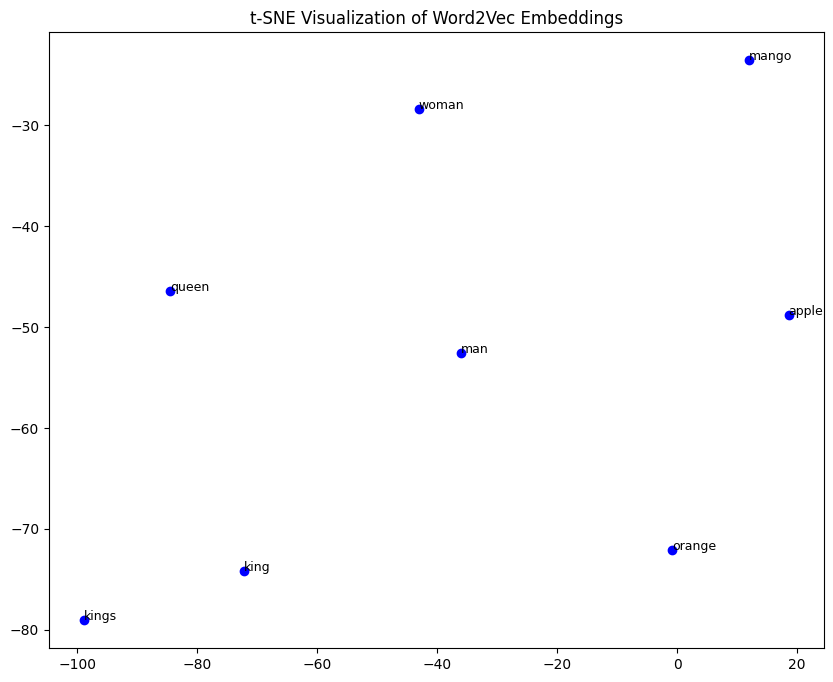

In [ ]:
# Get vectors and corresponding words
words = ["king","kings", "queen", "man", "woman", "apple","mango", "orange"]
vectors = np.array([model[word] for word in words])
print(vectors)

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=5, random_state=42)  # Adjust perplexity as needed
vectors_2d = tsne.fit_transform(vectors)
print(vectors_2d)
# Plot the word embeddings in 2D space
plt.figure(figsize=(10, 8))
for i, word in enumerate(words):
    x, y = vectors_2d[i]
    plt.scatter(x, y, marker='o', color='b')
    plt.text(x, y, word, fontsize=9)

plt.title("t-SNE Visualization of Word2Vec Embeddings")
plt.show()

In [ ]:
import pandas as pd

In [ ]:
# BeautifulSoup is used to remove html tags from the text
from bs4 import BeautifulSoup
import re # For regular expressions

# Stopwords can be useful to undersand the semantics of the sentence.
# Therefore stopwords are not removed while creating the word2vec model.
# But they will be removed  while averaging feature vectors.
from nltk.corpus import stopwords

In [ ]:
train = pd.read_csv("/content/labeledTrainData.tsv", header=0,\
                    delimiter="\t", quoting=3)

test = pd.read_csv("/content/testData.tsv",header=0,\
                    delimiter="\t", quoting=3)

In [ ]:
# This function converts a text to a sequence of words.
def review_wordlist(review, remove_stopwords=False):
    # 1. Removing html tags
    review_text = BeautifulSoup(review).get_text()
    # 2. Removing non-letter.
    review_text = re.sub("[^a-zA-Z]"," ",review_text)
    # 3. Converting to lower case and splitting
    words = review_text.lower().split()
    # 4. Optionally remove stopwords
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]

    return(words)

In [ ]:
# Stopwords can be useful to undersand the semantics of the sentence.
# Therefore stopwords are not removed while creating the word2vec model.
# But they will be removed  while averaging feature vectors.
from nltk.corpus import stopwords

In [ ]:
# word2vec expects a list of lists.
# Using punkt tokenizer for better splitting of a paragraph into sentences.

import nltk.data
nltk.download('popular')

tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

In [ ]:
# This function splits a review into sentences
def review_sentences(review, tokenizer, remove_stopwords=False):
    # 1. Using nltk tokenizer
    raw_sentences = tokenizer.tokenize(review.strip())
    sentences = []
    # 2. Loop for each sentence
    for raw_sentence in raw_sentences:
        if len(raw_sentence)>0:
            sentences.append(review_wordlist(raw_sentence,\
                                            remove_stopwords))

    # This returns the list of lists
    return sentences

In [ ]:

sentences = []
print("Parsing sentences from training set")
for review in train["review"]:
    sentences += review_sentences(review, tokenizer)


Parsing sentences from training set


<ipython-input-50-097af327c513>:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(review).get_text()
<ipython-input-50-097af327c513>:4: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  review_text = BeautifulSoup(review).get_text()


In [ ]:
# Importing the built-in logging module
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [ ]:
# Few tests: This will print the odd word among them
model.wv.doesnt_match("man woman dog child kitchen".split())

AttributeError: 'KeyedVectors' object has no attribute 'wv'

In [ ]:
num_features = 300  # Word vector dimensionality
min_word_count = 40  # Minimum word count
num_workers = 4      # Number of parallel threads
context = 10         # Context window size
downsampling = 1e-3  # Downsample setting for frequent words

# Initializing the train model
from gensim.models import word2vec
print("Training model....")
model = word2vec.Word2Vec(sentences,
                          workers=num_workers,
                          vector_size=num_features,  # Corrected argument name
                          min_count=min_word_count,
                          window=context,
                          sample=downsampling)

# To make the model memory efficient
model.init_sims(replace=True)

# Saving the model for later use. Can be loaded using Word2Vec.load()
model_name = "300features_40minwords_10context"
model.save(model_name)


Training model....


<ipython-input-59-9e8cf6ccd1f9>:18: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  model.init_sims(replace=True)


In [ ]:
# Few tests: This will print the odd word among them
model.wv.doesnt_match("man woman dog child kitchen".split())

'dog'

In [ ]:
model.wv.doesnt_match("france england germany berlin".split())

'france'

In [ ]:

# This will print the most similar words present in the model
model.wv.most_similar("man")

[('boy', 0.8914005160331726),
 ('doctor', 0.8661012053489685),
 ('cop', 0.8529142141342163),
 ('woman', 0.8431210517883301),
 ('girl', 0.8306191563606262),
 ('wife', 0.8231502175331116),
 ('agent', 0.8217267990112305),
 ('son', 0.8183223009109497),
 ('named', 0.8155468702316284),
 ('boss', 0.8100014328956604)]

In [ ]:
model.wv.most_similar("awful")

[('horrible', 0.9335243701934814),
 ('terrible', 0.9175832867622375),
 ('laughable', 0.8334531784057617),
 ('boring', 0.8059974908828735),
 ('predictable', 0.7904469966888428),
 ('weak', 0.7861838936805725),
 ('truly', 0.7852417826652527),
 ('ridiculous', 0.782756507396698),
 ('plain', 0.7814777493476868),
 ('writing', 0.7809323072433472)]

In [ ]:
model.wv.syn0.shape()

AttributeError: 'KeyedVectors' object has no attribute 'syn0'

In [ ]:
# Function to average all word vectors in a paragraph
def featureVecMethod(words, model, num_features):
    # Pre-initialising empty numpy array for speed
    featureVec = np.zeros(num_features,dtype="float32")
    nwords = 0

    #Converting Index2Word which is a list to a set for better speed in the execution.
    index2word_set = set(model.wv.index2word)

    for word in  words:
        if word in index2word_set:
            nwords = nwords + 1
            featureVec = np.add(featureVec,model[word])

    # Dividing the result by number of words to get average
    featureVec = np.divide(featureVec, nwords)
    return featureVec

In [ ]:
# Function for calculating the average feature vector
def getAvgFeatureVecs(reviews, model, num_features):
    counter = 0
    reviewFeatureVecs = np.zeros((len(reviews),num_features),dtype="float32")
    for review in reviews:
        # Printing a status message every 1000th review
        if counter%1000 == 0:
            print("Review %d of %d"%(counter,len(reviews)))

        reviewFeatureVecs[counter] = featureVecMethod(review, model, num_features)
        counter = counter+1

    return reviewFeatureVecs

In [ ]:
model

In [ ]:
# Calculating average feature vector for training set
clean_train_reviews = []
for review in train['review']:
    clean_train_reviews.append(review_wordlist(review, remove_stopwords=True))

trainDataVecs = getAvgFeatureVecs(clean_train_reviews, model, num_features)

<ipython-input-50-097af327c513>:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(review).get_text()


Review 0 of 4609


AttributeError: The index2word attribute has been replaced by index_to_key since Gensim 4.0.0.
See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4